In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

sns.set()
sns.set_style("dark")

## Checking clustering algorithm

Here this a mega cluster with **all the spontaneous data** that I checked and find good enough + **one fish with OMR**.

I tried different number of clusters. 

In [5]:
def new_df_cluster(df_long, nbFrames):
    
    tailAngle = pd.DataFrame(df_long, columns=['tailAngles' + str(i) for i in range(1, nbFrames+1)])
    instFreq = pd.DataFrame(df_long, columns=['instaTBF'  + str(i) for i in range(1,nbFrames+1)])
    instAsym = pd.DataFrame(df_long, columns=['instaAsym' + str(i) for i in range(1,nbFrames+1)])
    
    fishlabels = [a.split('_')[0]+'_'+a.split('_')[1] for a in df_long['Trial_ID']]
    maxInstFreq = [np.nanmax(abs(instFreq.loc[i])) for i in list(df_long.index)]
    maxInstAsym = [np.nanmax(abs(instAsym.loc[i])) for i in list(df_long.index)]
    medianInstFreq = [np.nanmedian(abs(instFreq.loc[i])) for i in list(df_long.index)]
    
    fishInterest = [0]*len(fishlabels)
    for i, j in enumerate(fishlabels):
        if j == fishOfInterest:
            fishInterest[i] = 1
    
    output = pd.DataFrame({'Fishlabel': fishlabels,
                           'Trial_ID': df_long.Trial_ID,
                          'NumBout': df_long.NumBout,
                          'NumberOfOscillations': df_long.NumberOfOscillations,
                          'meanTBF': df_long.meanTBF,
                          'maxAmplitude': df_long.maxAmplitude*57.2958,
                          'maxInstFreq': maxInstFreq,
                          'maxInstAsym': maxInstFreq,
                           'medianInstFreq': medianInstFreq,
                          'classification': df_long.classification,
                          'fishInterest': fishInterest})
    
    return output


def fig_clustering(new_df, fishOfInterest):
    
    plt.figure(figsize=(8,4))
    sns.stripplot(x='Trial_ID', y='classification', hue="Fishlabel", data=new_df)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    

def fig_params(new_df, fishOfInterest):
    
    plt.figure(figsize=(7,7))
    sns.stripplot(y='maxAmplitude', x='classification', hue='classification', data=new_df, palette="tab10")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.figure(figsize=(7,7))
    sns.stripplot(y='maxInstFreq', x='classification', hue='classification', data=new_df, palette="tab10")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.figure(figsize=(7,7))
    sns.stripplot(y='meanTBF', x='classification', hue='classification', data=new_df, palette="tab10")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.figure(figsize=(7,7))
    sns.stripplot(y='NumberOfOscillations', x='classification', hue='classification', data=new_df, palette="tab10")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.figure(figsize=(7,7))
    sns.scatterplot(y='meanTBF', x='maxAmplitude', hue='classification', data=new_df, palette="tab10")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.figure(figsize=(7,7))
    sns.scatterplot(y='maxInstFreq', x='maxAmplitude', hue='classification', data=new_df, palette="tab10")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    
    plt.figure(figsize=(7,7))
    sns.scatterplot(y='medianInstFreq', x='maxAmplitude', hue='classification', data=new_df, palette="tab10")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### N= 3 CLUSTERS

In [2]:
path = '/home/mathilde.lapoix/Bureau/ZZBehaviorAnalysis/results/OMRDataTest3clusters/'
fishOfInterest = '200813_F1'

with open(path+'output_dataframe_short', 'rb') as f:
    df = pickle.load(f)

df_long = pd.read_csv(path+'output_dataframe.csv')

# Load the tail angle for all these bouts
nbFramesTakenIntoAccount = 69

df = new_df_cluster(df_long, nbFramesTakenIntoAccount)

fig_clustering(df, '200813_F1')
fig_params(df, '200813_F1')

NameError: name 'pickle' is not defined

## N=4

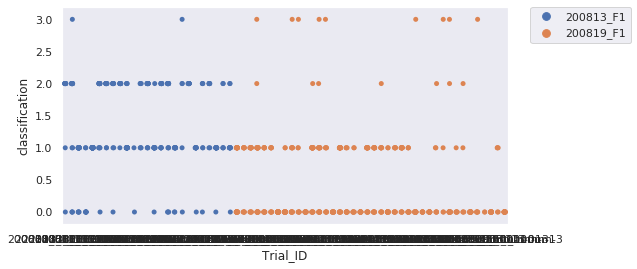

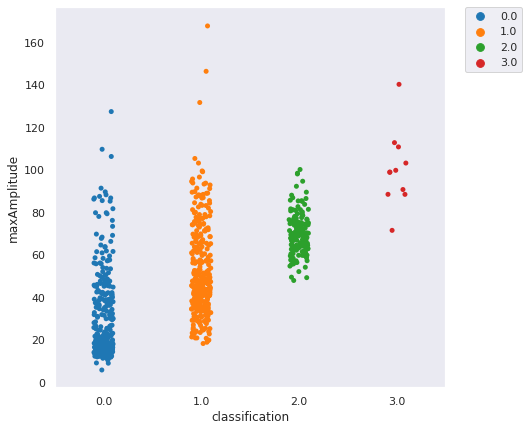

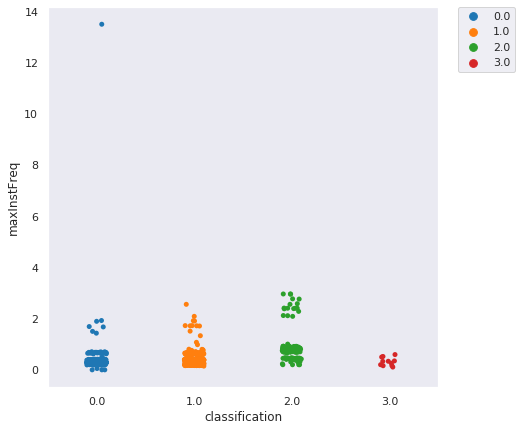

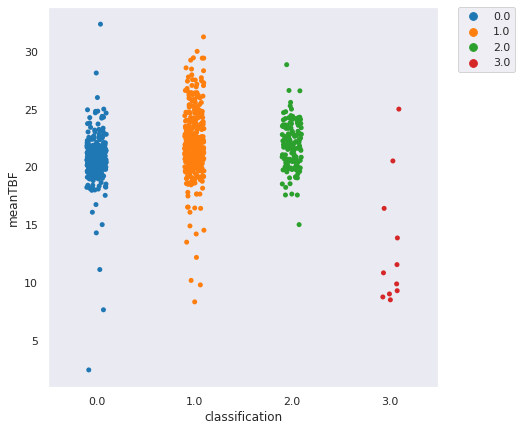

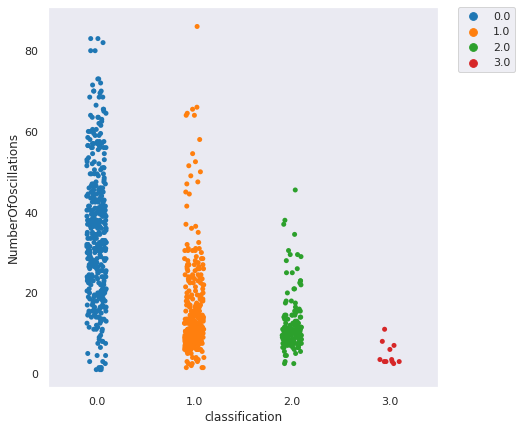

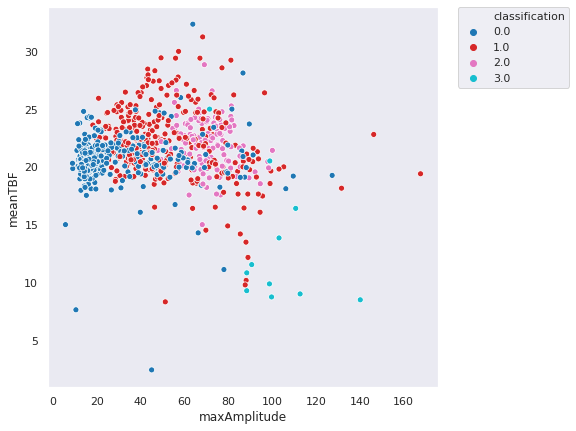

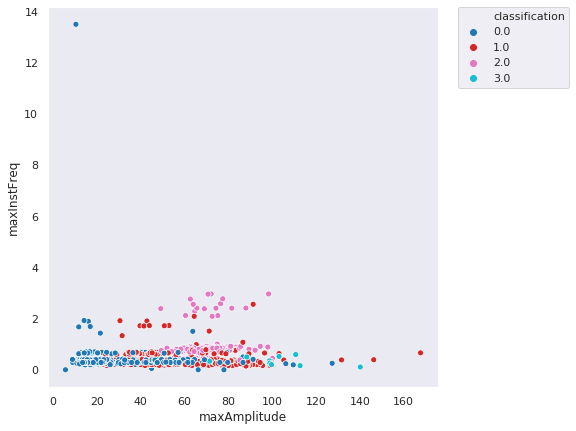

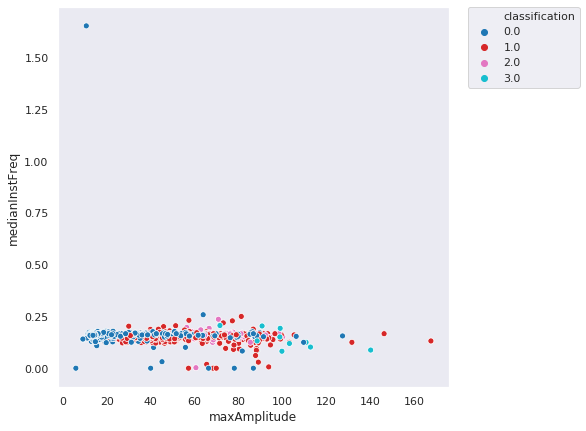

In [9]:
path = '/home/mathilde.lapoix/Bureau/ZZBehaviorAnalysis/results/OMRDataTest4clusters/'
fishOfInterest = '200813_F1'

with open(path+'output_dataframe_short', 'rb') as f:
    df = pickle.load(f)

df_long = pd.read_csv(path+'output_dataframe.csv')

# Load the tail angle for all these bouts
nbFramesTakenIntoAccount = 200

df = new_df_cluster(df_long, nbFramesTakenIntoAccount)

fig_clustering(df, '200813_F1')
fig_params(df, '200813_F1')

## N=5

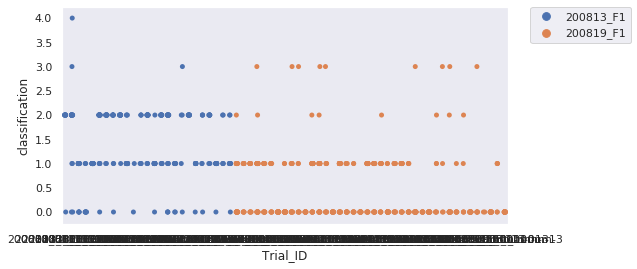

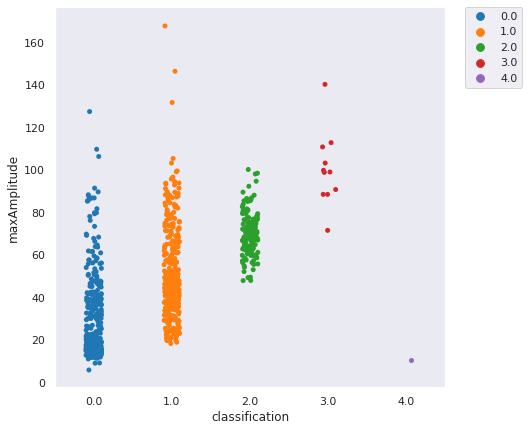

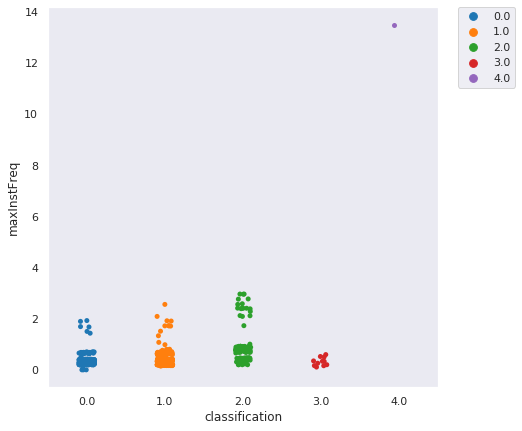

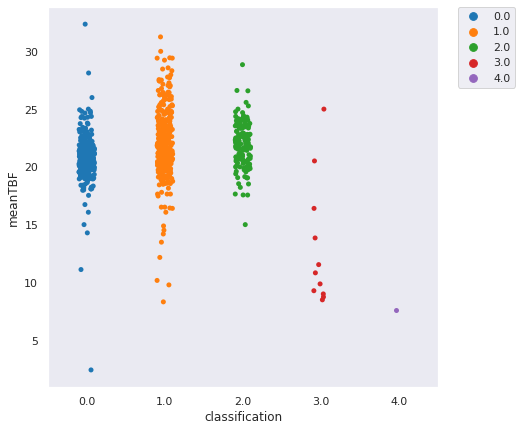

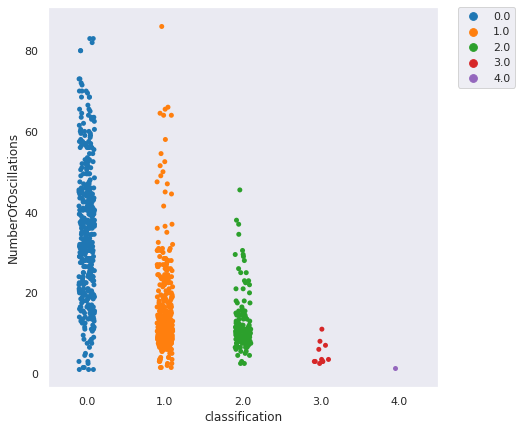

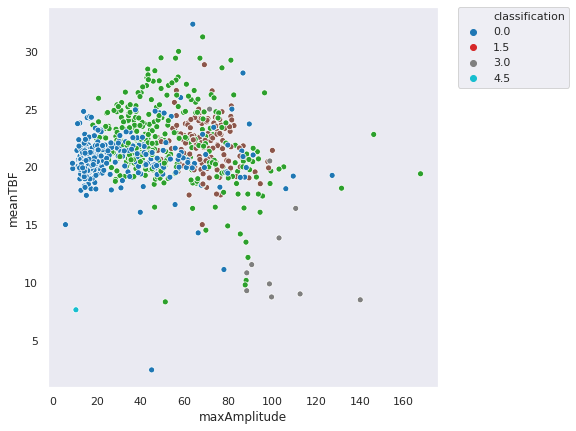

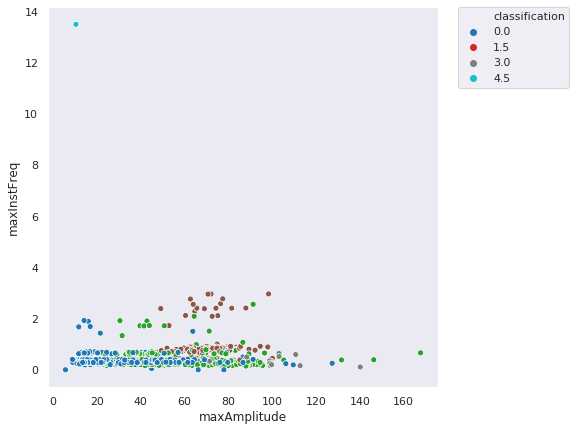

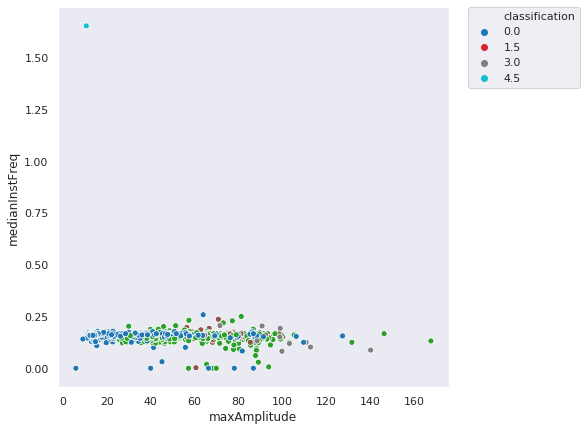

In [10]:
path = '/home/mathilde.lapoix/Bureau/ZZBehaviorAnalysis/results/OMRDataTest5clusters/'
fishOfInterest = '200813_F1'

with open(path+'output_dataframe_short', 'rb') as f:
    df = pickle.load(f)

df_long = pd.read_csv(path+'output_dataframe.csv')

# Load the tail angle for all these bouts
nbFramesTakenIntoAccount = 200

df = new_df_cluster(df_long, nbFramesTakenIntoAccount)

fig_clustering(df, '200813_F1')
fig_params(df, '200813_F1')

In [ ]:
def plot_bouts_cat(df_long):
    